This notebook will have the code required to make some of the figures in the paper. 


In [69]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
import numpy as np 
import os
import sys 
sys.path.append('/home/tbeleyur/Documents/packages_dev/correct_call_annotations')
import correct_call_annotations 
from correct_call_annotations import correct_call_annotations
import pandas as pd
import scipy.io.wavfile as wavfile

In [30]:
%matplotlib notebook

## Figure illustrating the whole-audio analyses

The virtual multi bat files were generated by adding multiple single bat audio files. I also saved the original source audio files. Let's load the data and see which audio combinations looks nice. 

In [45]:
data_folder = '../../annotation_audio_analysis/'
audio_folder = os.path.join('../../','individual_call_analysis/','hp_annotation_audio/')
source_file = os.path.join(data_folder,'source_files_for_virtual_multibat_audio.csv')
source_audio = pd.read_csv(source_file)

In [46]:
def split_into_source_files(string_with_source):
    raw_filenames = string_with_source.split(',')
    # remove single apostrophes
    no_apostrophes = [each.replace("'","") for each in raw_filenames]
    # remove spaces
    no_spaces = [ each.replace(" ", "") for each in no_apostrophes]
    return no_spaces




In [63]:
source_audio_files = split_into_source_files(source_audio['source_single_bat_files'][50])

all_audio = []

for each in source_audio_files:
    matched_audio  = correct_call_annotations.find_file_in_folder(each,
                                                                  audio_folder)
    fs, audio = wavfile.read(matched_audio[0])
    all_audio.append(audio[:,0])



Match found!
Match found!


In [70]:
make_50ms_divs = lambda X,fs: np.arange(0,X.size, int(0.05*fs))

In [103]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : scalars
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Returns
    -------
    text : `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : 

<IPython.core.display.Javascript object>


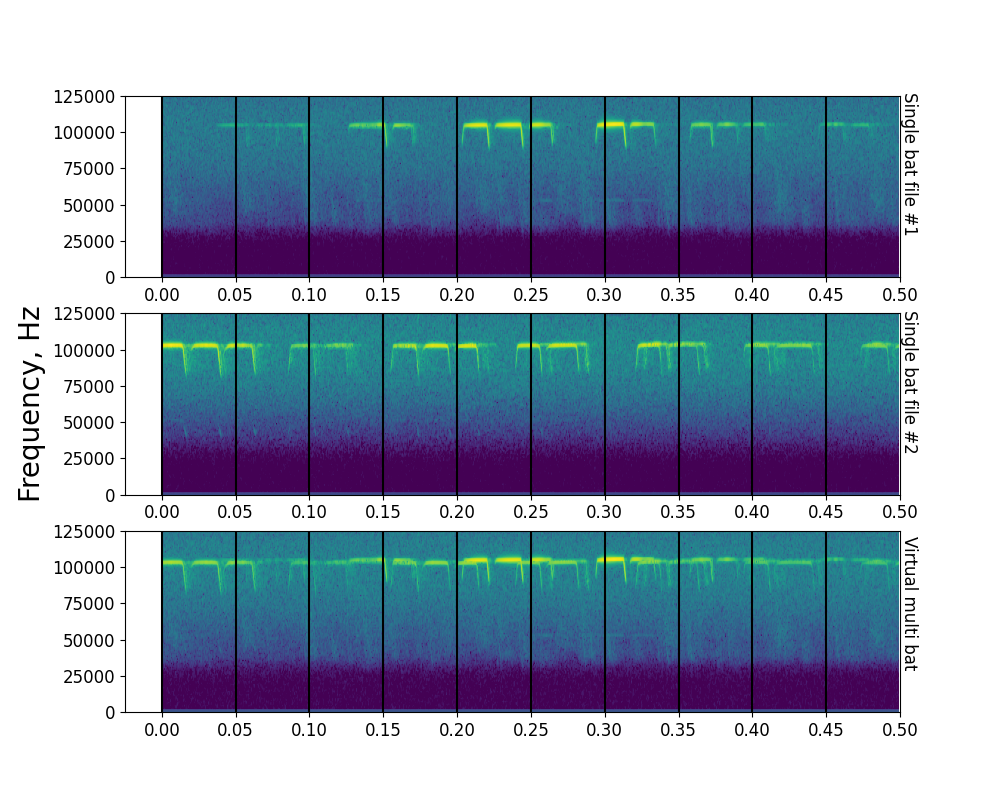

In [115]:
part_audio = [each[:int(0.5*fs)] for each in all_audio]
added_audio = part_audio[0] + part_audio[1]


plt.figure(figsize=(10,8))

a1 = plt.subplot(311)
plt.specgram(part_audio[0], Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_audio[0], fs)/fs, 0, fs*0.5)
plt.xticks([])
plt.text(0.50,fs*0.125,'Single bat file #1', rotation=270, fontsize=12)

a1.set_xticks(np.arange(0,0.55,0.05))
a1.tick_params(axis='both', which='major', labelsize=12)


a2 = plt.subplot(312)
plt.specgram(part_audio[1], Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_audio[1], fs)/fs, 0, fs*0.5)
plt.ylabel('Frequency, Hz', fontsize=20)
plt.xticks([])
plt.text(0.50,fs*0.125,'Single bat file #2', rotation=270, fontsize=12)

a2.set_xticks(np.arange(0,0.55,0.05))
a2.tick_params(axis='both', which='major', labelsize=12)


a3=plt.subplot(313)
plt.specgram(added_audio, Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(added_audio, fs)/fs, 0, fs*0.5)
plt.text(0.50,fs*0.125,'Virtual multi bat', rotation=270, fontsize=12)

a3.set_xticks(np.arange(0,0.55,0.05))
a3.tick_params(axis='both', which='major', labelsize=12)


### Figure showing single, multi, and virtual multi call 